# Import File and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
# Read file in as Pandas dataframe

dfh = pd.read_csv('kc_house_data.csv')
dfh.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yrs_old,renovated,...,SD_MercerIsland,SD_Northshore,SD_Renton,SD_Riverview,SD_Seattle,SD_Shoreline,SD_SnoqualmieValley,SD_Tahoma,SD_Tukwila,SD_VashonIsland
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,59,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,63,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,82,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,49,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Linear Regression Using Statsmodels

In [7]:
formula = 'price ~ grade'
model = ols(formula = formula, data = dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:56:40   Log-Likelihood:            -2.6918e+05
No. Observations:               20137   AIC:                         5.384e+05
Df Residuals:                   20135   BIC:                         5.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.313e+05   8146.077    -52.940      0.000   -4.47e+05   -4.15e+05
grade       1.198e+05   1075.603    111.386      0.000    1.18e+05    1.22e+05
==============================================================================
Omnibus:                      949.715   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1087.819
Skew:                           0.563   Prob(JB):                    6.07e-237
Kurtosis:                       3.175   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
dfh.drop(['renovated'], axis = 1, inplace = True)

In [25]:
dfh.drop(['SD_VashonIsland'], axis = 1, inplace = True)

In [26]:
outcome = 'price'
predictors = dfh.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [27]:
model = ols(formula=formula, data=dfh).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     1883.
Date:                Wed, 10 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:00:56   Log-Likelihood:            -2.6132e+05
No. Observations:               20137   AIC:                         5.227e+05
Df Residuals:                   20109   BIC:                         5.229e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.828e+05   1.44e+04    -33.457      0.000   -5.11e+05   -4.54e+05
bedrooms             1.498e+04   1013.097     14.789      0.000     1.3e+04     1.7e+04
bathrooms            5.056e+04   1700.316     29.737      0.000    4.72e+04    5.39e+04
floors               1.449e+04   2018.740      7.176      0.000    1.05e+04    1.84e+04
waterfront           1.475e+05   1.59e+04      9.290      0.000    1.16e+05    1.79e+05
view                 3.346e+04   1290.963     25.922      0.000    3.09e+04     3.6e+04
condition            1.922e+04   1262.306     15.229      0.000    1.67e+04    2.17e+04
grade                9.833e+04   1008.435     97.511      0.000    9.64e+04       1e+05
yrs_old              1551.7721     40.269     38.535      0.000    1472.842    1630.702
basement             2981.1073   1813.551      1.644      0.100    -573.601    6535.815
distance_from_city  -7966.4269    360.902    -22.074      0.000   -8673.825   -7259.029
SD_Auburn           -7.801e+04   1.13e+04     -6.898      0.000      -1e+05   -5.58e+04
SD_Bellevue          5.922e+04   1.13e+04      5.234      0.000     3.7e+04    8.14e+04
SD_Enumclaw          2.047e+04   1.24e+04      1.646      0.100   -3907.087    4.49e+04
SD_FederalWay       -1.041e+05   1.06e+04     -9.825      0.000   -1.25e+05   -8.33e+04
SD_Highline          -9.91e+04   1.09e+04     -9.080      0.000    -1.2e+05   -7.77e+04
SD_Issaquah          1.524e+04   1.06e+04      1.431      0.152   -5629.425    3.61e+04
SD_Kent              -1.09e+05   1.04e+04    -10.455      0.000   -1.29e+05   -8.86e+04
SD_LakeWashington    4.493e+04   1.07e+04      4.198      0.000     2.4e+04    6.59e+04
SD_MercerIsland      1.749e+05   1.39e+04     12.624      0.000    1.48e+05    2.02e+05
SD_Northshore        -796.6991   1.08e+04     -0.074      0.941    -2.2e+04    2.04e+04
SD_Renton           -1.158e+05   1.08e+04    -10.680      0.000   -1.37e+05   -9.45e+04
SD_Riverview         1.388e+04   1.17e+04      1.184      0.237   -9102.895    3.69e+04
SD_Seattle          -5203.5260   1.08e+04     -0.480      0.631   -2.64e+04     1.6e+04
SD_Shoreline        -3.885e+04   1.06e+04     -3.658      0.000   -5.97e+04    -1.8e+04
SD_SnoqualmieValley  5.763e+04   1.11e+04      5.198      0.000    3.59e+04    7.94e+04
SD_Tahoma           -3.865e+04   1.11e+04     -3.483      0.000   -6.04e+04   -1.69e+04
SD_Tukwila          -1.438e+05   1.22e+04    -11.808      0.000   -1.68e+05    -1.2e+05
==============================================================================
Omnibus:                     1207.861   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2086.329
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                       4.267  

## Model Validation

In [10]:
dfh.dropna(inplace = True)

In [11]:
dfh.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
yrs_old                0
renovated              0
basement               0
distance_from_city     0
SD_Auburn              0
SD_Bellevue            0
SD_Enumclaw            0
SD_FederalWay          0
SD_Highline            0
SD_Issaquah            0
SD_Kent                0
SD_LakeWashington      0
SD_MercerIsland        0
SD_Northshore          0
SD_Renton              0
SD_Riverview           0
SD_Seattle             0
SD_Shoreline           0
SD_SnoqualmieValley    0
SD_Tahoma              0
SD_Tukwila             0
SD_VashonIsland        0
dtype: int64

In [12]:
y = dfh[['price']]
X = dfh.drop(['price'], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16109 4028 16109 4028


In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 10945348457.71419
Test Mean Squarred Error: 10957720754.293911


In [17]:
resid = model.resid

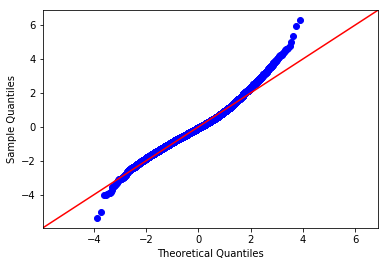

In [18]:
fig = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit = True)

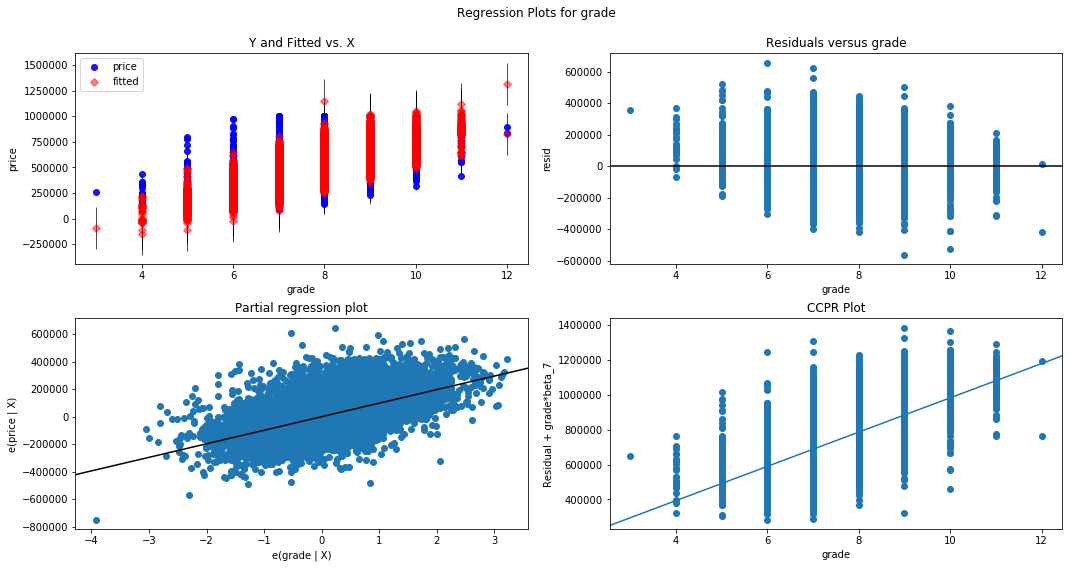

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

## Cross Validation

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [21]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-11069558121.396116
-11079457126.812057
-11020412038.077005
